In [1]:
import numpy as np
import pandas as pd
import sgdLR
import standardLR
import seaborn as sns
import matplotlib.pyplot as plt
from lr import LinearRegression, file_to_numpy

In [2]:
# load the train and test data
xTrain = file_to_numpy("new_xTrain.csv")
yTrain = file_to_numpy("eng_yTrain.csv")
xTest = file_to_numpy("new_xTest.csv")
yTest = file_to_numpy("eng_yTest.csv")

# setting the seed for deterministic behavior
np.random.seed(334)

In [3]:
epoch = 101  # set a large epoch to get near the final MSE

In [4]:
lr = 0.001
bs1 = 1
model = sgdLR.SgdLR(lr, bs1, epoch)
stats1 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [5]:
lr = 0.001
bs2 = 430  # divisible small number
model = sgdLR.SgdLR(lr, bs2, epoch)
stats2 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [6]:
lr = 0.01
bs3 = int(len(xTrain)/3)  # bottom third
model = sgdLR.SgdLR(lr, bs3, epoch)
stats3 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [7]:
lr = 0.1
bs4 = int(len(xTrain)/2)  # in the middle
model = sgdLR.SgdLR(lr, bs4, epoch)
stats4 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [8]:
lr = 0.1
bs5 = int(2*len(xTrain)/3)  # top 3rd
model = sgdLR.SgdLR(lr, bs5, epoch)
stats5 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [9]:
lr = 0.1
bs6 = int(len(xTrain))  # max
model = sgdLR.SgdLR(lr, bs6, epoch)
stats6 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [10]:
dfTrain = dfTest = pd.DataFrame(columns=['time', 'mse', 'bs']) # pd.DataFrame(columns=['time', '1', '430', '1290', len(xTrain)/3, len(xTrain)/2, 2*len(xTrain)/3, len(xTrain)])  # columns are learning rates

model = standardLR.StandardLR()
closedFormStats = model.train_predict(xTrain, yTrain, xTest, yTest)

# Assuming we only care about ending time
# train
dfTrain = dfTrain.append(pd.Series({'time': stats1[list(stats1.keys())[-1]]['time'], 'mse': stats1[list(stats1.keys())[-1]]['train-mse'], 'bs': bs1}), ignore_index=True)
dfTrain = dfTrain.append(pd.Series({'time': stats2[list(stats2.keys())[-1]]['time'], 'mse': stats2[list(stats2.keys())[-1]]['train-mse'], 'bs': bs2}), ignore_index=True)
dfTrain = dfTrain.append(pd.Series({'time': stats3[list(stats3.keys())[-1]]['time'], 'mse': stats3[list(stats3.keys())[-1]]['train-mse'], 'bs': bs3}), ignore_index=True)
dfTrain = dfTrain.append(pd.Series({'time': stats4[list(stats4.keys())[-1]]['time'], 'mse': stats4[list(stats4.keys())[-1]]['train-mse'], 'bs': bs4}), ignore_index=True)
dfTrain = dfTrain.append(pd.Series({'time': stats5[list(stats5.keys())[-1]]['time'], 'mse': stats5[list(stats5.keys())[-1]]['train-mse'], 'bs': bs5}), ignore_index=True)
dfTrain = dfTrain.append(pd.Series({'time': stats6[list(stats6.keys())[-1]]['time'], 'mse': stats6[list(stats6.keys())[-1]]['train-mse'], 'bs': bs6}), ignore_index=True)
dfTrain = dfTrain.append(pd.Series({'time': closedFormStats[0]['time'], 'mse': closedFormStats[0]['train-mse'], 'bs': "Closed Form"}), ignore_index=True)

# test
dfTest = dfTest.append(pd.Series({'time': stats1[list(stats1.keys())[-1]]['time'], 'mse': stats1[list(stats1.keys())[-1]]['test-mse'], 'bs': bs1}), ignore_index=True)
dfTest = dfTest.append(pd.Series({'time': stats2[list(stats2.keys())[-1]]['time'], 'mse': stats2[list(stats2.keys())[-1]]['test-mse'], 'bs': bs2}), ignore_index=True)
dfTest = dfTest.append(pd.Series({'time': stats3[list(stats3.keys())[-1]]['time'], 'mse': stats3[list(stats3.keys())[-1]]['test-mse'], 'bs': bs3}), ignore_index=True)
dfTest = dfTest.append(pd.Series({'time': stats4[list(stats4.keys())[-1]]['time'], 'mse': stats4[list(stats4.keys())[-1]]['test-mse'], 'bs': bs4}), ignore_index=True)
dfTest = dfTest.append(pd.Series({'time': stats5[list(stats5.keys())[-1]]['time'], 'mse': stats5[list(stats5.keys())[-1]]['test-mse'], 'bs': bs5}), ignore_index=True)
dfTest = dfTest.append(pd.Series({'time': stats6[list(stats6.keys())[-1]]['time'], 'mse': stats6[list(stats6.keys())[-1]]['test-mse'], 'bs': bs6}), ignore_index=True)
dfTest = dfTest.append(pd.Series({'time': closedFormStats[0]['time'], 'mse': closedFormStats[0]['test-mse'], 'bs': "Closed Form"}), ignore_index=True)


In [11]:
print(dfTrain)  # just to see if it makes sense

        time       mse           bs
0  11.305181  0.348831          1.0
1   1.312196  0.364432        430.0
2   1.295682  0.397930       5590.0
3   1.292733  0.348000       8385.0
4   1.302066  0.348002      11180.0
5   1.276083  0.348000      16770.0
6   0.002002  0.375955  Closed Form


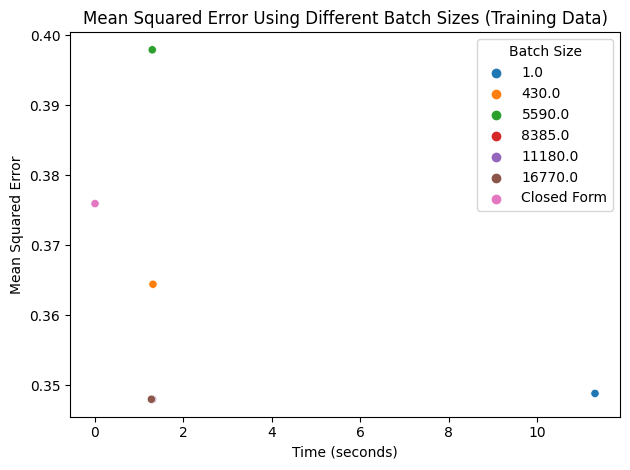

In [12]:
# Training graph
graph = sns.scatterplot(data=dfTrain, x='time', y='mse', hue='bs', palette='tab10', legend='full')
graph.set(xlabel="Time (seconds)", ylabel="Mean Squared Error", title="Mean Squared Error Using Different Batch Sizes (Training Data)")
graph.legend(title="Batch Size")
# graph.set_yticks(dfTrain['mse'])
plt.tight_layout()
plt.show()

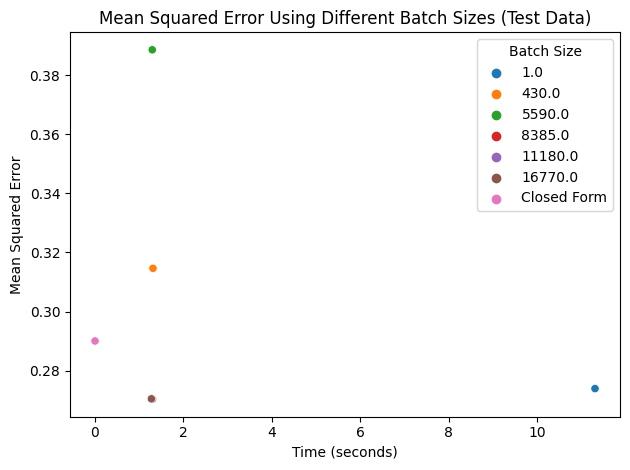

In [13]:
# Test Graph
graph = sns.scatterplot(data=dfTest, x='time', y='mse', hue='bs', palette='tab10', legend='full')
graph.set(xlabel="Time (seconds)", ylabel="Mean Squared Error", title="Mean Squared Error Using Different Batch Sizes (Test Data)")
graph.legend(title="Batch Size")
plt.tight_layout()
plt.show()